In [1]:
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import msvi.trans_func
import msvi.posterior

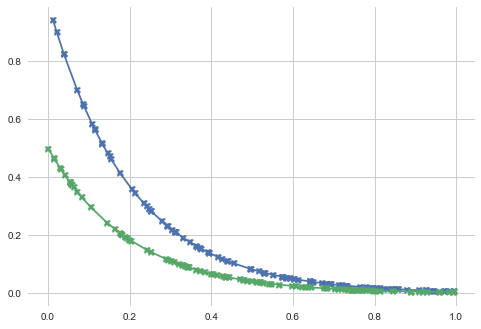

In [2]:
# Generate data.

lm = -5.0

# t = torch.linspace(0, 1, 101).reshape(1, -1, 1).repeat(2, 1, 1)
t = torch.rand((2, 101, 1)).sort(dim=1)[0]

y0 = torch.tensor([1.0, 0.5]).reshape(2, 1, 1)
y = (y0 * torch.exp(lm * t)).unsqueeze(-1)

with torch.no_grad():
    plt.plot(t[0].view(-1), y[0].view(-1), "X-")
    plt.plot(t[1].view(-1), y[1].view(-1), "X-")
    plt.show()

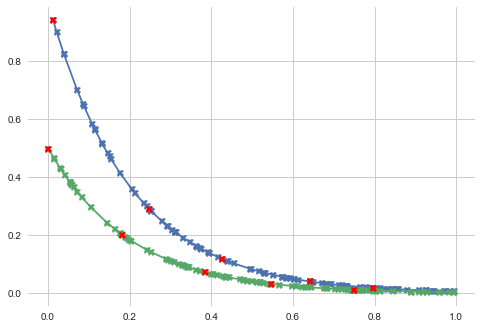

In [3]:
# Select shooting variables.

block_size = 20
n_blocks = int((t.shape[1] - 1) / block_size)
s = y[:, :-1:block_size, :, 0]
with torch.no_grad():
    plt.plot(t[0].view(-1), y[0].view(-1), "X-")
    plt.plot(t[1].view(-1), y[1].view(-1), "X-")

    plt.plot(t[0].view(-1)[:-1:block_size], s[0].view(-1), "rX")
    plt.plot(t[1].view(-1)[:-1:block_size], s[1].view(-1), "rX")

    plt.show()

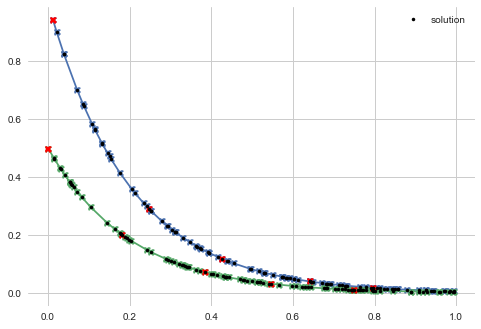

In [4]:
# Apply transition function.

f = nn.Sequential(nn.Linear(1, 1, bias=False))
f[0].weight.data = torch.tensor([[lm]])
F = msvi.trans_func.ODETransitionFunction(f)

t_F = msvi.posterior.extract_time_grids(t, n_blocks)
s_new = F(s, t_F)

with torch.no_grad():
    plt.plot(t[0].view(-1), y[0].view(-1), "X-")
    plt.plot(t[1].view(-1), y[1].view(-1), "X-")

    plt.plot(t[0].view(-1)[:-1:block_size], s[0].view(-1), "rX")
    plt.plot(t[1].view(-1)[:-1:block_size], s[1].view(-1), "rX")

    plt.plot(t[0].view(-1)[1:], s_new[0].view(-1), "k.", label="solution")
    plt.plot(t[1].view(-1)[1:], s_new[1].view(-1), "k.")

    plt.legend()

    plt.show()

In [5]:
# Difference between data and solution.
nn.L1Loss()(s_new, y[:, 1:, :, 0])

tensor(2.8528e-07, grad_fn=<L1LossBackward0>)